In [37]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.applications.vgg16 import VGG16

In [38]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [39]:
conv_base.trainable = False



In [40]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [56]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
 
model.add(Dense(1,activation='sigmoid'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_18 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 1)                 129       
                                                                 
Total params: 16,845,121
Trainable params: 2,130,433
N

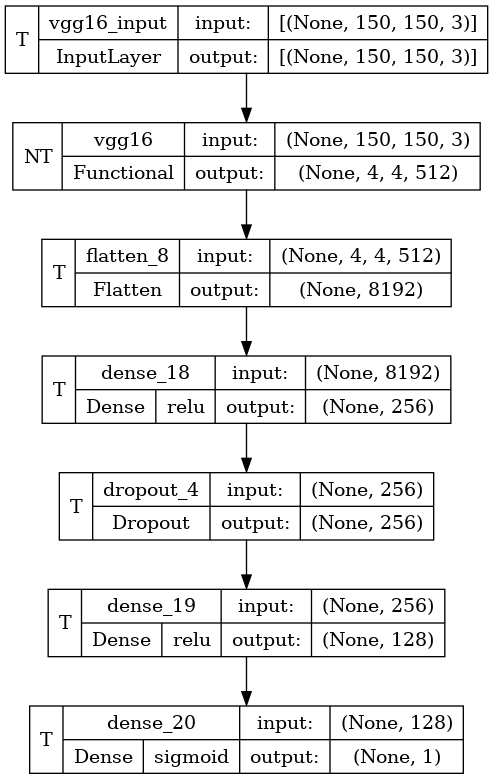

In [59]:
tensorflow.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=True,
)

In [51]:
batch_size = 32

train_datagen = ImageDataGenerator(
     rotation_range=30,
     width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
 fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/dogs-vs-cats/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
        '/kaggle/input/dogs-vs-cats/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [52]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

In [53]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
625/625 [==============================] - 153s 243ms/step - loss: 0.3866 - accuracy: 0.8229 - val_loss: 0.2360 - val_accuracy: 0.8982
Epoch 2/10
625/625 [==============================] - 147s 235ms/step - loss: 0.3308 - accuracy: 0.8518 - val_loss: 0.2288 - val_accuracy: 0.9030
Epoch 3/10
625/625 [==============================] - 151s 241ms/step - loss: 0.3188 - accuracy: 0.8568 - val_loss: 0.2140 - val_accuracy: 0.9114
Epoch 4/10
625/625 [==============================] - 146s 233ms/step - loss: 0.3035 - accuracy: 0.8659 - val_loss: 0.2150 - val_accuracy: 0.9132
Epoch 5/10
625/625 [==============================] - 147s 235ms/step - loss: 0.2952 - accuracy: 0.8673 - val_loss: 0.2148 - val_accuracy: 0.9108
Epoch 6/10
625/625 [==============================] - 146s 234ms/step - loss: 0.2931 - accuracy: 0.8706 - val_loss: 0.2075 - val_accuracy: 0.9146
Epoch 7/10
625/625 [==============================] - 146s 234ms/step - loss: 0.2909 - accuracy: 0.8704 - val_loss: 0.2150 -

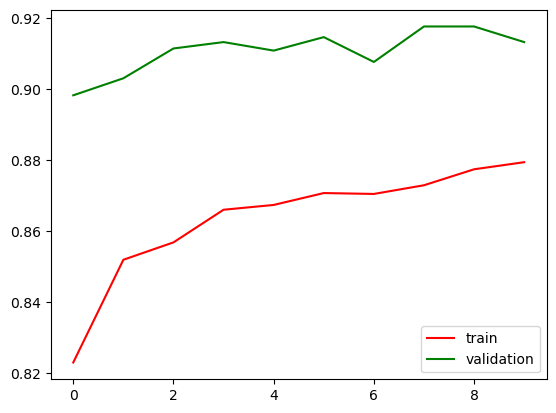

In [61]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='green',label='validation')
plt.legend()
plt.show()

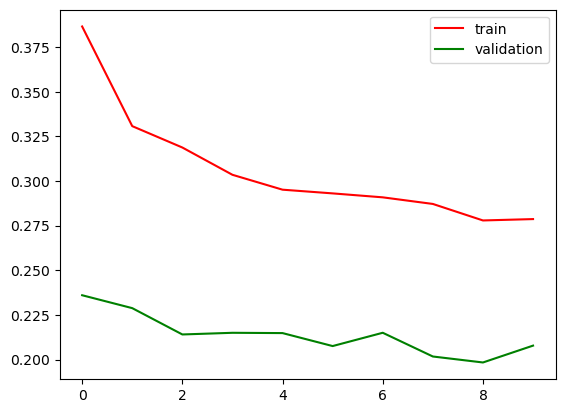

In [60]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='green',label='validation')
plt.legend()
plt.show()

In [62]:
from tensorflow.keras.models import save_model
save_model(model, "model.h5")